# Monty Hall
--------------------------
##  __Règles __ du __ jeu __:


Il y a 3 portes l'un d'entre elle cache derrière une voiture et les deux autres une chèvre. On a le choix d'ouvrir une de ces portes. Après avoir effectué notre choix et avant d'ouvrir la porte choisie, le présentateur ouvre une porte avec une chèvre derrière. On demande alors d'effectuer un nouveau choix ou de rester sur le précédent sachant qu'il ne reste que deux portes.

In [52]:
#Modules
%matplotlib inline
from random import randint
from enum import Enum
import matplotlib.pyplot as plt
import numpy as np

In [6]:
#Classes
class Strategie(Enum):
    CHANGER = 1
    GARDER = 0

In [7]:
#Fonctions
def play_game(strategie):
    portes = [0,1,2]
    bonne_porte = randint(0,2)
    premier_choix = randint(0,2)
    portes.remove(premier_choix)#portes restante
    
    if premier_choix == bonne_porte:
        portes.remove(portes[randint(0,1)]) #présentateur élimine une porte restante
    else:
        portes = [bonne_porte]
    
    deuxieme_choix = 0
    
    if (strategie == Strategie.GARDER):
        deuxième_choix = premier_choix  #Garde le choix de départ
    else:
        deuxieme_choix = portes[0] #Seule porte restante
        
    return deuxieme_choix == bonne_porte

def play(strategie,nb_tours):
    return [1 if play_game(strategie) else 0 for i in range(nb_tours)]

In [8]:
play_game(Strategie.CHANGER)

True

In [9]:
print("Nombre de fois que le joueur a gagné en gardant son premier choix:",sum(play(Strategie.GARDER,1000)))


Nombre de fois que le joueur a gagné en gardant son premier choix: 343


In [10]:
print("Nombre de fois que le joueur a gagné en changeant son choix:",sum(play(Strategie.CHANGER,1000)))


Nombre de fois que le joueur a gagné en changeant son choix: 674


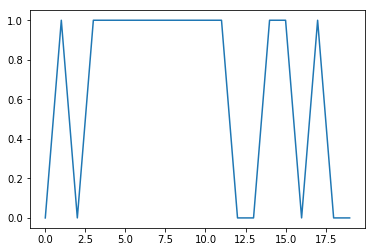

In [12]:
plt.plot(play(Strategie.CHANGER,20))

<Container object of 2 artists>

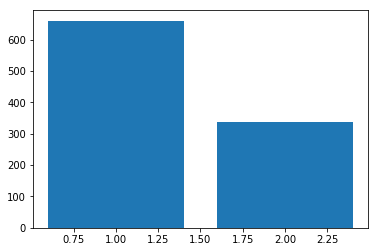

In [13]:
plt.bar([1,2],[sum(play(Strategie.CHANGER,1000)),sum(play(Strategie.GARDER,1000))])

In [14]:
gains_changer = []
gains_garder = []

samples = [50,100,500,1000,5000,10000,50000,100000]
for tours in samples:
    gains_changer.append(play(Strategie.CHANGER,tours))
    gains_garder.append(play(Strategie.GARDER,tours))
    

Text(0,0.5,'gains')

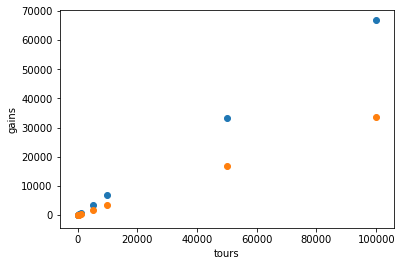

In [15]:
plt.figure()
plt.scatter(samples,[sum(x) for x in gains_changer])
plt.scatter(samples,[sum(x) for x in gains_garder])
plt.xlabel('tours')
plt.ylabel('gains')

In [57]:
moyenne_garder = []
moyenne_changer = []
somme_garder = [sum(x) for x in gains_garder]
somme_changer = [sum(x) for x in gains_changer]
div = lambda x,y:[x[k]/y[k] for k in range(len(x))]
moyenne_garder = div(somme_garder,samples)
moyenne_changer = div(somme_changer,samples)

Text(0,0.5,'Moyenne des gains')

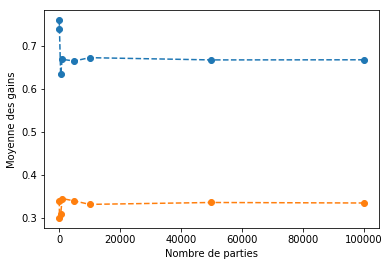

In [63]:
plt.figure()
plt.plot(samples,moyenne_changer,'--o')
plt.plot(samples,moyenne_garder,'--o')
plt.xlabel('Nombre de parties')
plt.ylabel('Moyenne des gains')

## __Conclusion__:


On gagne deux fois plus en changeant de choix de porte qu'en gardant le premier choix !